In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
wine=pd.read_csv('WineQT.csv')

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
wine.pop('Id')

0          0
1          1
2          2
3          3
4          4
        ... 
1138    1592
1139    1593
1140    1594
1141    1595
1142    1597
Name: Id, Length: 1143, dtype: int64

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
X=wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y=wine['quality'] 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

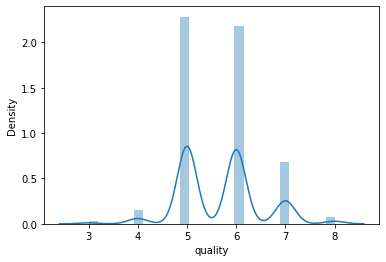

In [8]:
sb.distplot(wine['quality'])

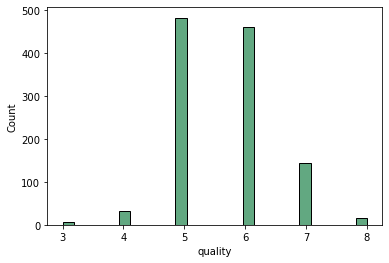

In [9]:
sb.histplot(wine['quality'],color='seagreen')
plt.show()

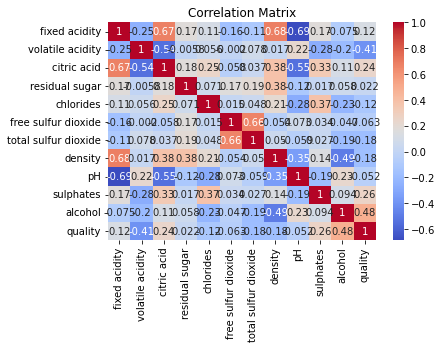

In [10]:
corr_matrix=wine.corr()
sb.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

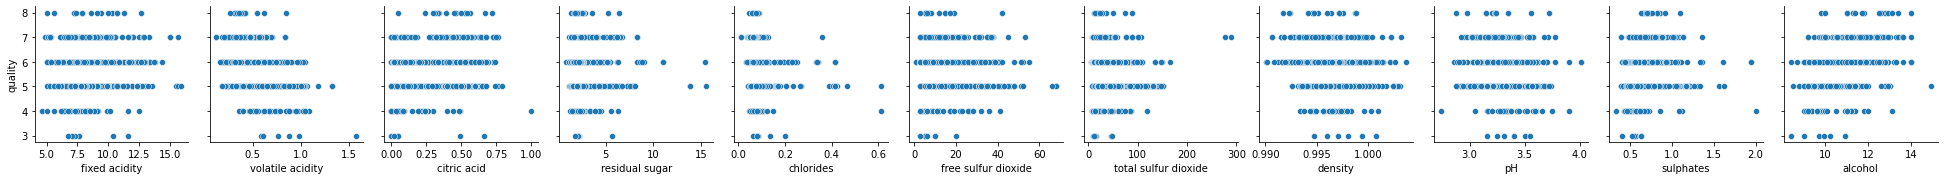

In [11]:
sb.pairplot(wine,x_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],y_vars='quality',kind='scatter')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
lin_reg=LinearRegression()

In [15]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [16]:
lin_reg.coef_

array([ 1.80189198e-02, -1.11309393e+00, -1.55465030e-01,  1.56630609e-02,
       -1.74618022e+00,  1.57255145e-03, -2.56010786e-03, -2.06975146e+01,
       -3.44247272e-01,  9.33416805e-01,  2.77231179e-01])

In [17]:
pd.DataFrame(lin_reg.coef_,index=X.columns,columns=['mycoef'])


,mycoef
fixed acidity,0.018019
volatile acidity,-1.113094
citric acid,-0.155465
residual sugar,0.015663
chlorides,-1.746180
free sulfur dioxide,0.001573
total sulfur dioxide,-0.002560
density,-20.697515
pH,-0.344247
sulphates,0.933417


In [18]:
pred=lin_reg.predict(X_test)

In [19]:
r2_score(y_test,pred)

0.3583957341251701

In [20]:
mean_absolute_error(y_test,pred)

0.5211893473480768

In [21]:
mean_squared_error(y_test,pred)

0.4372222124921897

In [22]:
lin_reg.predict([[8,0.5,0.15,1.9,0.07,23.0,35.0,0.92,3.5,0.65,10.2]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.22032212])